# Heart Disease Prediction with Logistic Regression

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Import Data

In [2]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Adapun dataset dapat diakses di link berikut : https://archive.ics.uci.edu/ml/datasets/heart+disease

In [3]:
df.shape

(303, 14)

Data terdiri dari 303 baris dan 14 kolom.

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Tipe data telah sesuai.

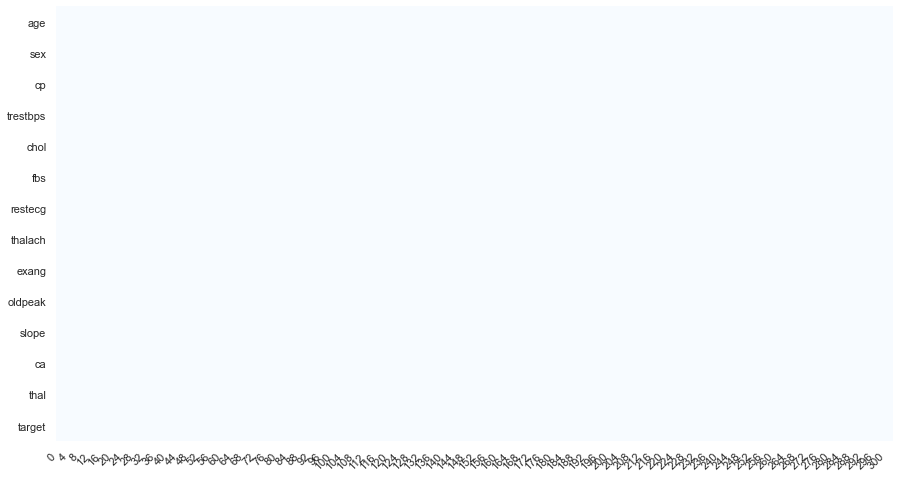

In [5]:
plot_missing_value(df)

Data telah bersih.

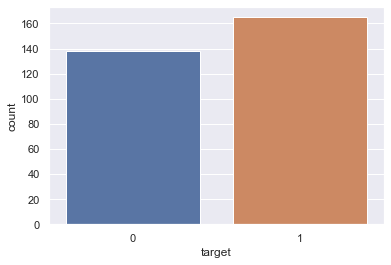

In [6]:
sns.countplot(df.target);

Target variabel balanced.

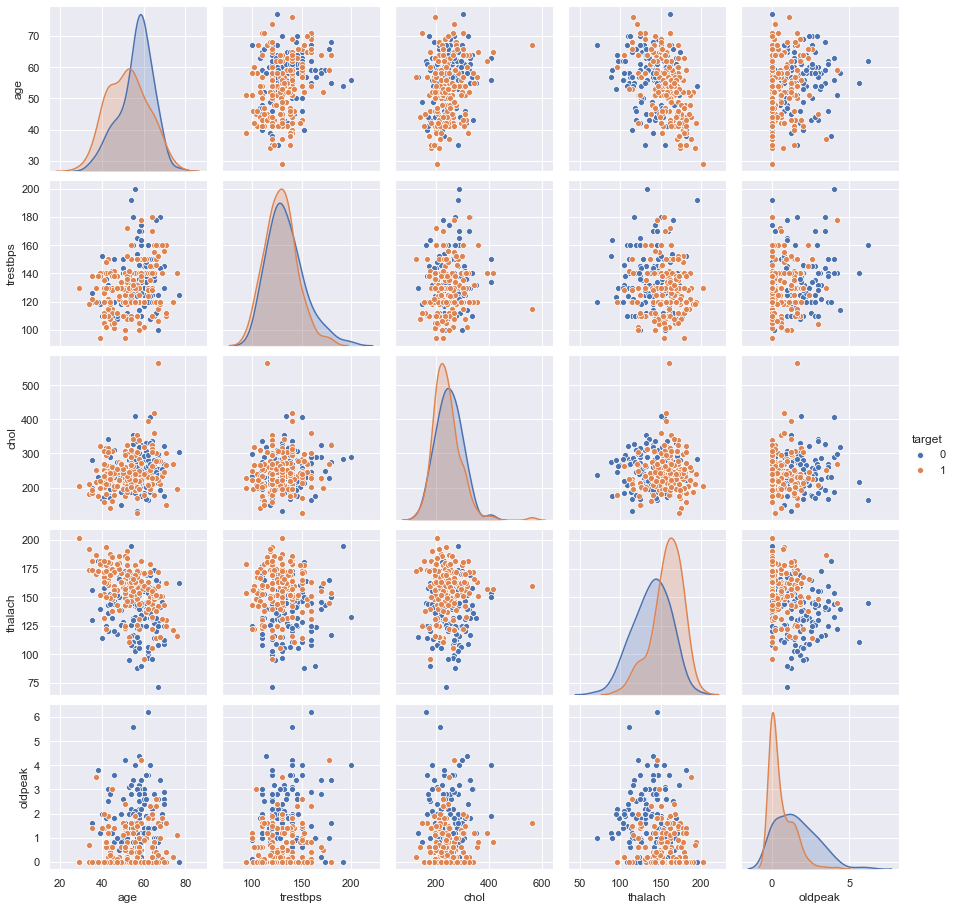

In [7]:
sns.pairplot(df, hue='target', vars=['age','trestbps','chol','thalach','oldpeak']);

## Dataset Splitting

In [8]:
X = df.drop(columns="target")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Modeling

In [9]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.linear_model import LogisticRegression

In [10]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [11]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [12]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['age','trestbps','chol','thalach','oldpeak']),
    ('categoric', cat_pipe(encoder='onehot'), ['sex','cp','fbs','restecg','exang','slope','ca','thal']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s


{'algo__C': 1.0, 'algo__fit_intercept': False}
0.8760330578512396 0.8597789115646257 0.8852459016393442


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.5s finished


## Features Important 

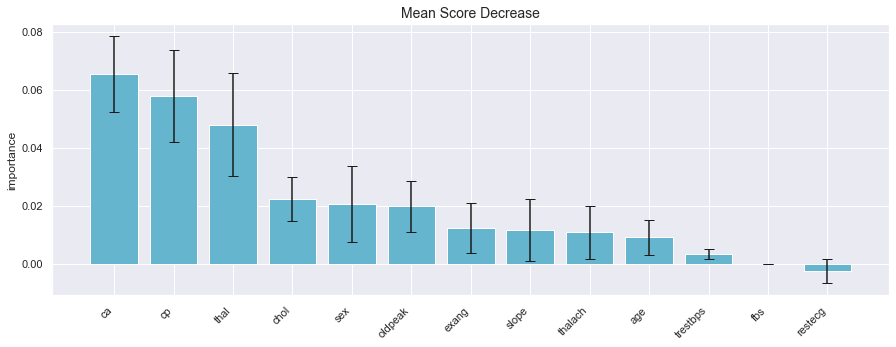

In [13]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

ca dan cp dengan selisih yang tidak jauh menjadi fitur paling penting dalam memprediksi apakah seseorang memiliki penyakit jantung atau tidak.

## Polynomial Features

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['age','trestbps','chol','thalach','oldpeak']),
    ('categoric', cat_pipe(encoder='onehot'), ['sex','cp','fbs','restecg','exang','slope','ca','thal']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_poly_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 413 out of 420 | elapsed:   14.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   15.0s finished


{'algo__C': 1.0, 'algo__fit_intercept': True, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8760330578512396 0.8597789115646257 0.8852459016393442


Tidak terjadi perubahan skor (akurasi) pada train, val dan test setelah dilakukan polynomial features.

## Fine Tuning

In [15]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [16]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['age','trestbps','chol','thalach','oldpeak']),
    ('categoric', cat_pipe(encoder='onehot'), ['sex','cp','fbs','restecg','exang','slope','ca','thal']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__C': [1, 2, 3]}


model = GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 1, 'algo__fit_intercept': False}
0.8760330578512396 0.8597789115646257 0.8852459016393442


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


Setelah dilakukan fine tuning tidak terjadi perubahan skor pada train, val dan test yang berarti kita telah mendapatkan hyperparameter yang optimal.

## Evaluasi 

In [17]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix

In [18]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.87      0.91      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242


Test report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



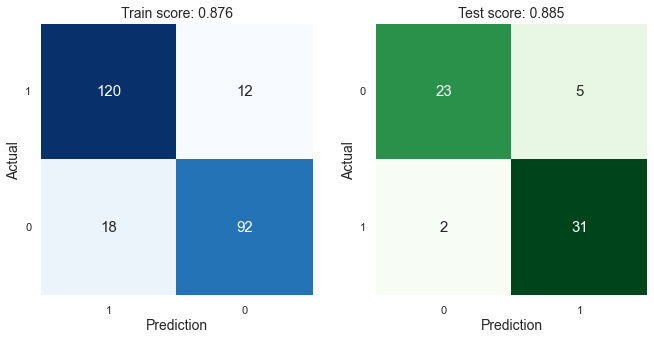

In [19]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## Save Model

In [20]:
save_model(model.best_estimator_, "heart.pkl")

Model is pickled as model/heart.pkl
